### Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions 

Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
* Get all the episode names, whose average rating is more than 8 for every season
* Get all the episode names that aired before May 2019
* Get the episode name from each season with the highest and lowest rating
* Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('westworld_episodes.csv')

In [4]:
df

,id,url,name,season number,episode number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [5]:
df.shape

(36, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season number        36 non-null     int64  
 4   episode number       36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium image link    36 non-null     object 
 12  original image link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on

In [9]:
seaon_ratings = df.groupby('season number')['average rating']
seaon_ratings_dict = seaon_ratings.first().to_dict()
seaon_ratings_dict

{1: 8.0, 2: 7.8, 3: 8.0, 4: 7.1}

Text(0, 0.5, 'Rating')

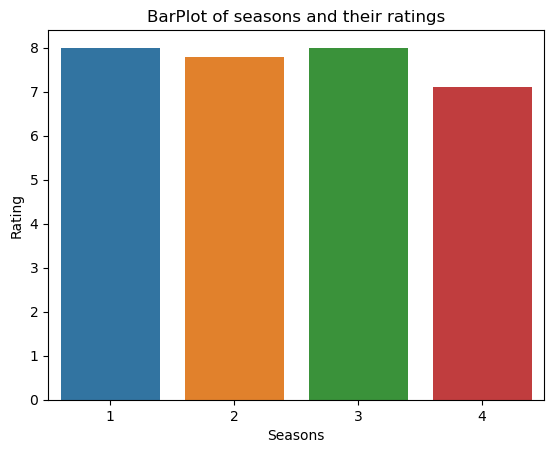

In [10]:

keys = list(seaon_ratings_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = list(seaon_ratings_dict.values())
sns.barplot(x=keys, y=vals)
plt.title('BarPlot of seasons and their ratings')
plt.xlabel('Seasons')
plt.ylabel('Rating')

### Get all the episode names, whose average rating is more than 8 for every season

In [11]:
df_rating = df[df['average rating']>8][['name','season number','average rating']]

In [12]:
df_rating

,name,season number,average rating
6,Trompe L'Oeil,1,8.6
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
18,Vanishing Point,2,8.4
19,The Passenger,2,8.5


### Get all the episode names that aired before May 2019

In [15]:
split_year=lambda x:int(x.split('-')[0])
split_month=lambda x:int(x.split('-')[1])
split_month('2016-11-20')

11

In [16]:
df1=df[df['airdate'].apply(split_year)<2019] #airdate before 2019
df2=df[(df['airdate'].apply(split_year)==2019) & (df['airdate'].apply(split_month)<5)]
#airdate in 2019 and before May
episode_before_may_2019 = df1.append(df2)['name'] #appen two data frames and get the episode names

C:\Users\HP\AppData\Local\Temp\ipykernel_12840\2923895806.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  episode_before_may_2019 = df1.append(df2)['name'] #appen two data frames and get the episode names


In [17]:
episode_before_may_2019 

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

###  Get the episode name from each season with the highest and lowest rating

In [18]:
# Find the episode with the highest rating for each season
highest_ratings = df.groupby('season number')['average rating'].idxmax()
episodes_highest_rating = df.loc[highest_ratings, ['season number', 'name', 'average rating']]
print("Episodes with the highest rating:")
print(episodes_highest_rating)

# Find the episode with the lowest rating for each season
lowest_ratings = df.groupby('season number')['average rating'].idxmin()
episodes_lowest_rating = df.loc[lowest_ratings, ['season number', 'name', 'average rating']]
print("\nEpisodes with the lowest rating:")
print(episodes_lowest_rating)

Episodes with the highest rating:
    season number                name  average rating
9               1  The Bicameral Mind             8.7
17              2             Kiksuya             8.7
20              3        Parce Domine             8.0
32              4            Zhuangzi             7.8

Episodes with the lowest rating:
    season number          name  average rating
2               1     The Stray             7.6
14              2  Akane No Mai             7.6
25              3   Decoherence             7.5
28              4  The Auguries             7.1


### Get the summary for the most popular ( ratings ) episode in every season


In [30]:
most_popular_episode=df.groupby('season number')['average rating'].idxmax()
episodes_highest_rating = df.loc[most_popular_episode, ['season number','summary','average rating']]
episodes_highest_rating

,season number,summary,average rating
9,1,Delores finds out the truth about William's fa...,8.7
17,2,Another of Westworld's Host revolutionaries is...,8.7
20,3,"If you're stuck in a loop, try walking in a st...",8.0
32,4,God is bored.,7.8


In [36]:
for i,summary in enumerate(episodes_highest_rating['summary']):
    print("Season number: ",i+1)
    print("Summary: ",summary)
    print()

Season number:  1
Summary:  Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season number:  2
Summary:  Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season number:  3
Summary:  If you're stuck in a loop, try walking in a straight line.

Season number:  4
Summary:  God is bored.

